In [1]:
import os
import json

import numpy as np
import matplotlib.pyplot as plt

14.39090052805841


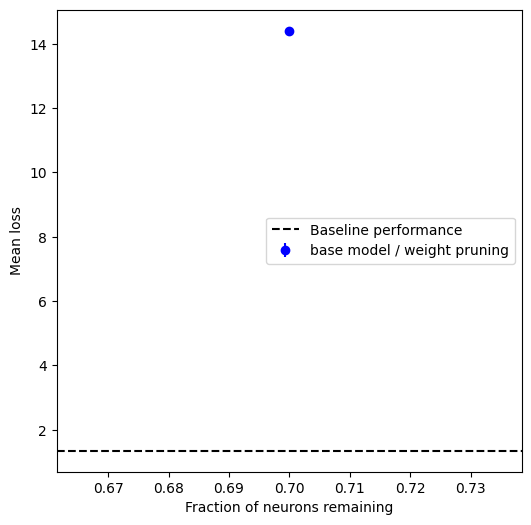

In [16]:
plt.figure(figsize=(6, 6))

exp = "/afs/csail.mit.edu/u/a/asher/narrow/pruned_models"
files = [os.path.join(exp, "evaluation_results.json")]
mean_losses = []
std_of_mean_losses = []
frac_neurons_remaining = []
for file in files:
    with open(file, "r") as f:
        data = json.load(f)
    mean_losses.append(data["mean_loss"])
    print(data["mean_loss"])
    std_of_mean_losses.append(data["std_of_mean"])
    total_neurons_pruned = data["pruning_stats"]["total_neurons_pruned"]
    total_neurons = data["pruning_stats"]["total_neurons"]
    frac_remaining = (total_neurons - total_neurons_pruned) / total_neurons
    frac_neurons_remaining.append(frac_remaining)
plt.errorbar(frac_neurons_remaining, mean_losses, yerr=std_of_mean_losses, fmt="o", label="base model / weight pruning", color='blue')

# exp = "tune-weight"
# dirs = [d for d in os.listdir(exp) if d.startswith("threshold")]
# files = [os.path.join(exp, d, "evaluation_results.json") for d in dirs]
# mean_losses = []
# std_of_mean_losses = []
# frac_neurons_remaining = []
# for file in files:
#     with open(file, "r") as f:
#         data = json.load(f)
#     mean_losses.append(data["mean_loss"])
#     std_of_mean_losses.append(data["std_of_mean"])
#     total_neurons_pruned = data["pruning_stats"]["total_neurons_pruned"]
#     total_neurons = data["pruning_stats"]["total_neurons"]
#     frac_remaining = (total_neurons - total_neurons_pruned) / total_neurons
#     frac_neurons_remaining.append(frac_remaining)
# plt.errorbar(frac_neurons_remaining, mean_losses, yerr=std_of_mean_losses, fmt="o", label="tuned model / weight pruning", color='orange')

# exp = "base-attribution"
# dirs = [d for d in os.listdir(exp) if d.startswith("threshold")]
# files = [os.path.join(exp, d, "evaluation_results.json") for d in dirs]
# mean_losses = []
# std_of_mean_losses = []
# frac_neurons_remaining = []
# for file in files:
#     with open(file, "r") as f:
#         data = json.load(f)
#     mean_losses.append(data["mean_loss"])
#     std_of_mean_losses.append(data["std_of_mean"])
#     total_neurons_pruned = data["pruning_stats"]["total_neurons_pruned"]
#     total_neurons = data["pruning_stats"]["total_neurons"]
#     frac_remaining = (total_neurons - total_neurons_pruned) / total_neurons
#     frac_neurons_remaining.append(frac_remaining)
# plt.errorbar(frac_neurons_remaining, mean_losses, yerr=std_of_mean_losses, fmt="x", label="base model / attribution pruning", color='blue')


# exp = "tune-attribution"
# dirs = [d for d in os.listdir(exp) if d.startswith("threshold")]
# files = [os.path.join(exp, d, "evaluation_results.json") for d in dirs]
# mean_losses = []
# std_of_mean_losses = []
# frac_neurons_remaining = []
# for file in files:
#     with open(file, "r") as f:
#         data = json.load(f)
#     mean_losses.append(data["mean_loss"])
#     std_of_mean_losses.append(data["std_of_mean"])
#     total_neurons_pruned = data["pruning_stats"]["total_neurons_pruned"]
#     total_neurons = data["pruning_stats"]["total_neurons"]
#     frac_remaining = (total_neurons - total_neurons_pruned) / total_neurons
#     frac_neurons_remaining.append(frac_remaining)
# plt.errorbar(frac_neurons_remaining, mean_losses, yerr=std_of_mean_losses, fmt="x", label="tuned model / attribution pruning", color='orange')

plt.xlabel("Fraction of neurons remaining")
plt.ylabel("Mean loss")
plt.axhline(y=1.35, color='black', linestyle='--', label="Baseline performance")
# plt.yscale('log')
plt.legend()